<a href="https://colab.research.google.com/github/inocentejr/CODE7_IFSP_SLT/blob/main/Simulacao_Motor_DC_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

     |████████████████████████████████| 357 kB 5.4 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=3459f480c5f124ff55c0dd86e8911e955898eea160f3bb60b654a5a52f6e69f2
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


## Carregamento dos módulos necessários

Para rodar este programa precisaremos dos módulos:

- control
- plotly
- matplotlib

In [ ]:
import control
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
## Simulação do Motor

J = 0.01 #Inércia do rotor [kgm²/s²]
B = 0.1 #Atrito viscoso do rotor [Nms]
Kv = 0.01
Kt = 0.01
Ra = 1 #Resistência elétrica da armadura [Ohm]
La = 0.5 #Indutância da armadura [H]

s = control.tf('s')

G = Kt/((J*s+B)*(Ra+La*s)+Kv*Kt)
t,y = control.step_response(G)

In [ ]:
px.line(x=t,y=y,title='Resposta ao Degrau do Motor CC')

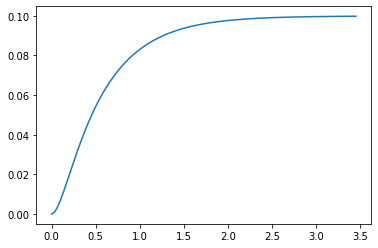

In [ ]:
plt.plot(t,y)

In [ ]:
## Controlador
Kp = 30
Ki = 10
Kd = 1

K = Kp+1/s*Ki+s*Kd
K

TransferFunction(array([ 1, 30, 10]), array([1, 0]))

In [ ]:
T = control.feedback(K*G,1)
t2,y2 = control.step_response(T)

px.line(x=t2,y=y2,title = 'Resposta ao Degrau - Malha Fechada')

(array([[-9.99749922+0.00000000e+00j, -2.00250078+0.00000000e+00j],
        [-9.82020675+0.00000000e+00j, -2.17979325+0.00000000e+00j],
        [-9.63427561+0.00000000e+00j, -2.36572439+0.00000000e+00j],
        [-9.43830464+0.00000000e+00j, -2.56169536+0.00000000e+00j],
        [-9.23046721+0.00000000e+00j, -2.76953279+0.00000000e+00j],
        [-9.00830483+0.00000000e+00j, -2.99169517+0.00000000e+00j],
        [-8.76837092+0.00000000e+00j, -3.23162908+0.00000000e+00j],
        [-8.50556523+0.00000000e+00j, -3.49443477+0.00000000e+00j],
        [-8.2117497 +0.00000000e+00j, -3.7882503 +0.00000000e+00j],
        [-7.91543143+0.00000000e+00j, -4.08456857+0.00000000e+00j],
        [-7.56394321+0.00000000e+00j, -4.43605679+0.00000000e+00j],
        [-7.10587485+0.00000000e+00j, -4.89412515+0.00000000e+00j],
        [-6.95771571+0.00000000e+00j, -5.04228429+0.00000000e+00j],
        [-6.78197161+0.00000000e+00j, -5.21802839+0.00000000e+00j],
        [-6.55293742+0.00000000e+00j, -5.4470625

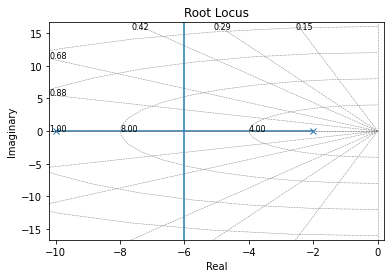

In [ ]:
control.rlocus(G)